In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'ADANIENT.NS'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,44.909592,44.909592,43.376842,44.242844,37.327034,4426427
1,2012-01-03,44.449768,45.062866,43.491798,44.043587,37.158924,7148175
2,2012-01-04,44.043587,45.062866,42.334572,42.633457,35.969212,7327278
3,2012-01-05,42.319244,42.564484,40.617889,40.939770,34.540276,6668403
4,2012-01-06,40.311340,41.920727,40.012455,41.162018,34.727787,7823555
...,...,...,...,...,...,...,...
2700,2022-12-14,4076.000000,4092.050049,4040.000000,4055.800049,4050.113770,1114492
2701,2022-12-15,4055.800049,4073.050049,4025.000000,4043.750000,4038.080566,866138
2702,2022-12-16,4018.899902,4047.899902,3944.050049,3980.800049,3975.218750,1598960
2703,2022-12-19,3988.000000,4104.000000,3971.449951,4075.300049,4069.586426,1643404


In [5]:
ma_100_days = data.Close.rolling(100).mean()

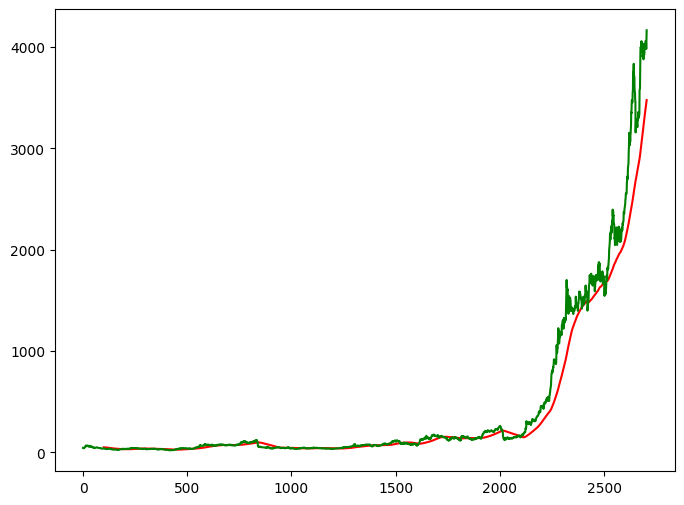

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

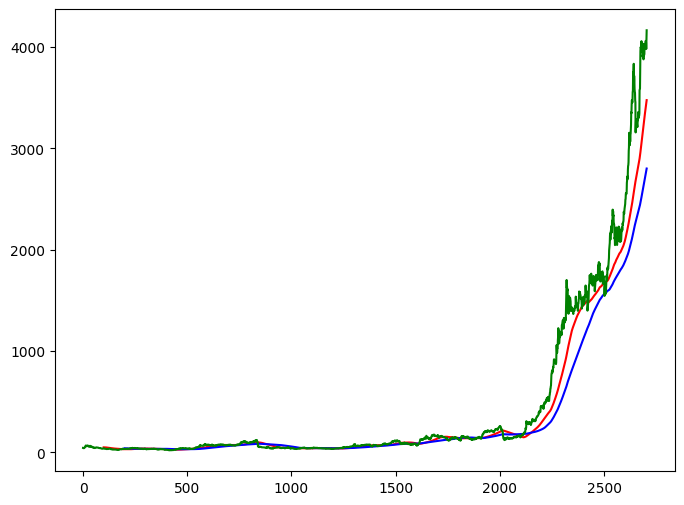

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2164

In [12]:
data_test.shape[0]

541

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\TANISHKA SHARMA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - loss: 0.0414
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0063
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0042
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0043
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0040
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0035
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 329ms/step - loss: 0.0033
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - loss: 0.0038
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0028
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0033
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 331ms/step - loss: 0.0025
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 331ms/step - loss: 0.0025
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - loss: 0.0028
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0023
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

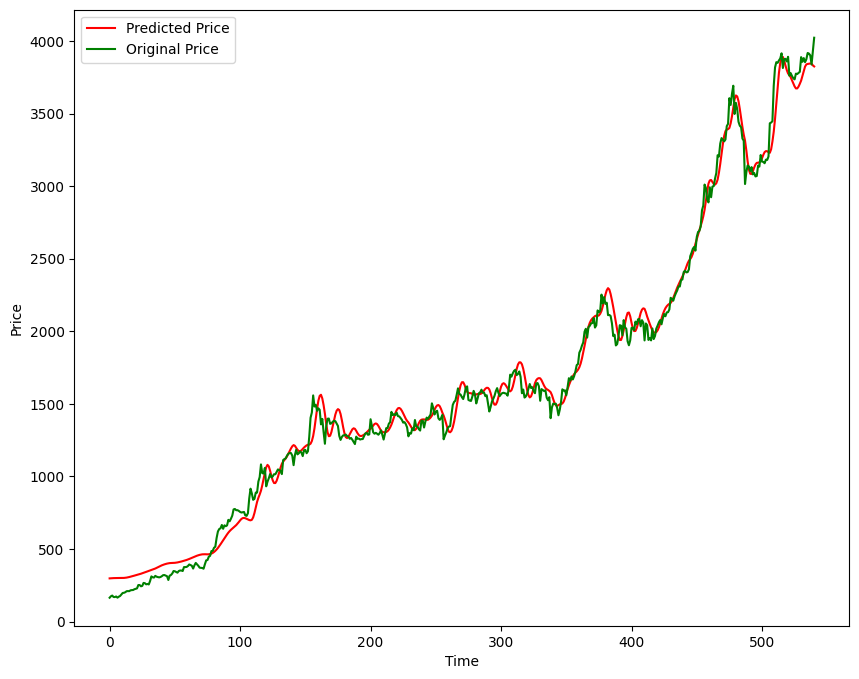

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Predictions Model.keras')